In [22]:
# Default setup
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.grid'] = True
plt.style.use('ggplot')

In [23]:
data = pd.read_csv('dataset.csv')
Q = np.array([x/2 for x in data['2Q']])
I = np.array([b for b in data['I']])

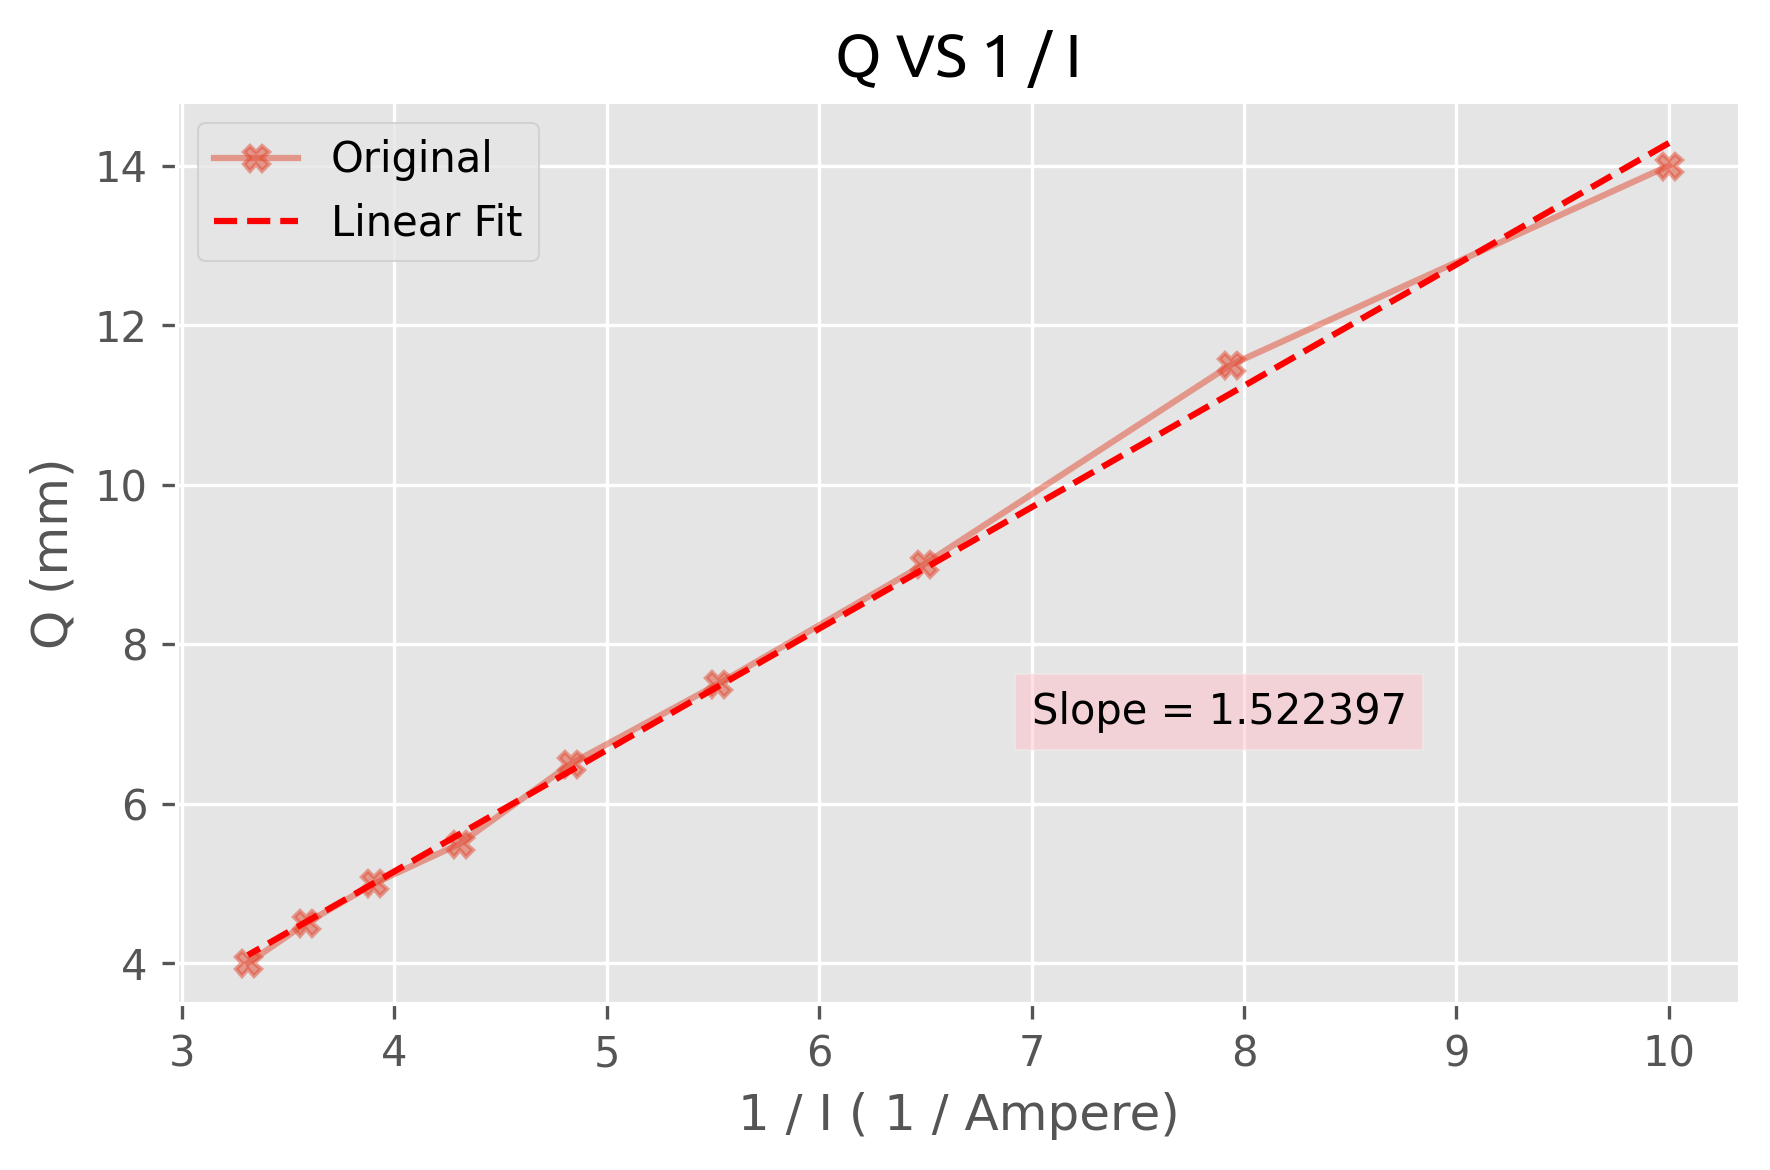

In [24]:
csfont = {'fontname':'Ubuntu'}
plt.title("Q VS 1 / I",**csfont)
plt.plot(1/I,Q,'-X',alpha = 0.5)
plt.xlabel("1 / I ( 1 / Ampere)")
plt.ylabel("Q (mm)")
m, c = np.polyfit(1/I,Q,1)
plt.text(7,7,'Slope = {}'.format(m.__round__(6)),bbox=dict(facecolor='pink', alpha=0.5))
plt.plot(1/I, m*(1/I) + c,'--',color = 'red')
plt.legend(["Original","Linear Fit"])
plt.tight_layout()
plt.savefig('Figure')

In [14]:
# Datas
h = 6.6261 * 10**-27    # h in CGS
v = 15 * 10**6          # Converting to Hz
P = 43 * 10**-1         # converting to cm
a = 7.7                 # Already in cm 
M = 9.27 * 10**-21      # M in CGS
n = 500                 # no unit
slope = m*10**-1        # Converting slope from Ampere-mm to Biot-cm

$$
\Large
\begin{equation}
g = \frac{10 \sqrt{125}\quad h  \nu_\circ a P}{64\sqrt{2}\quad \pi n \mu_\circ I Q}
\end{equation}
$$

In [15]:
num = h * v * a * P * 10 * np.sqrt(125)
den = np.pi * n * M * slope * 64 * np.sqrt(2)
print("g =",num/den)

g = 1.833753011558984


In [16]:
P = [43]*len(I)
H = [(32 * np.pi * n * val)/(10 * np.sqrt(125) * a) for val in I]
HPP = [2 * np.sqrt(2) * val for val in H]
H0 = [HPP[i] * (Q[i]/P[i]) for i in range(len(HPP))]
g1 = [(h*v)/(M*val) for val in H0]
g2 = [(h * v * a * P[i] * 10 * np.sqrt(125)/(np.pi * n * M * Q[i]*I[i] * 64 * np.sqrt(2))) for i in range(len(Q))]

In [17]:
frame = {}
frame["I (A)"] = I
frame["P (mm)"] = P
frame["Q (mm)"] = Q
frame["H (G)"] = H
frame["HPP (G)"] = HPP
frame["H0 (G)"] = H0
frame["g"] = g1

In [18]:
df = pd.DataFrame(frame)
df.index+=1

In [19]:
df

,I (A),P (mm),Q (mm),H (G),HPP (G),H0 (G),g
1,0.100,43,14.0,5.838807,16.514640,5.376860,1.994072
2,0.126,43,11.5,7.356897,20.808447,5.565050,1.926640
3,0.154,43,9.0,8.991763,25.432546,5.323091,2.014214
4,0.181,43,7.5,10.568241,29.891499,5.213634,2.056501
5,0.207,43,6.5,12.086331,34.185305,5.167546,2.074843
6,0.232,43,5.5,13.546032,38.313965,4.900623,2.187853
7,0.256,43,5.0,14.947346,42.277479,4.915986,2.181016
8,0.279,43,4.5,16.290272,46.075846,4.821891,2.223577
9,0.302,43,4.0,17.633197,49.874214,4.639462,2.311010


In [20]:
meang = sum(g1)/len(g1)
meang

2.107747334751516